In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv('../data/clean/training_dataset.csv') 
df2 = pd.read_csv('../data/clean/waiting_times_interpolated.csv')

In [25]:
df.head()

,date,attraction,minute,actual_over_posted
0,2015-01-01,7_dwarfs_train,510,0.733333
1,2015-01-01,7_dwarfs_train,540,0.523810
2,2015-01-01,7_dwarfs_train,570,0.458333
3,2015-01-01,7_dwarfs_train,600,0.647059
4,2015-01-01,7_dwarfs_train,630,0.611111


In [26]:
df2.head()

,Unnamed: 0,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted
0,0,2015-01-01,7_dwarfs_train,0,NaN,NaN,NaN,NaN
1,1,2015-01-01,7_dwarfs_train,30,NaN,NaN,NaN,NaN
2,2,2015-01-01,7_dwarfs_train,60,NaN,NaN,NaN,NaN
3,3,2015-01-01,7_dwarfs_train,90,NaN,NaN,NaN,NaN
4,4,2015-01-01,7_dwarfs_train,120,NaN,NaN,NaN,NaN


In [27]:
df2_cl = df2.dropna()

In [28]:
df2_cl.isna().sum()

Unnamed: 0            0
date                  0
attraction            0
minute                0
SACTMIN               0
SPOSTMIN              0
SPOSTMIN_interp       0
actual_over_posted    0
dtype: int64

In [29]:
df2_cl.describe()

,Unnamed: 0,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted
count,1.751616e+06,1.751616e+06,1.751616e+06,1.751616e+06,1.751616e+06,1.751616e+06
mean,2.211380e+06,1.133608e+03,2.342854e+01,3.191442e+01,3.191442e+01,inf
std,1.275966e+06,3.038576e+02,2.132181e+01,2.919913e+01,2.919913e+01,NaN
min,1.700000e+01,1.800000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.080280e+06,8.700000e+02,1.000000e+01,1.000000e+01,1.000000e+01,4.444444e-01
50%,2.231338e+06,1.140000e+03,2.000000e+01,2.500000e+01,2.500000e+01,7.500000e-01
75%,3.406643e+06,1.410000e+03,3.000000e+01,4.500000e+01,4.500000e+01,1.250000e+00
max,4.264864e+06,1.620000e+03,3.300000e+02,3.600000e+02,3.600000e+02,inf


<Axes: >

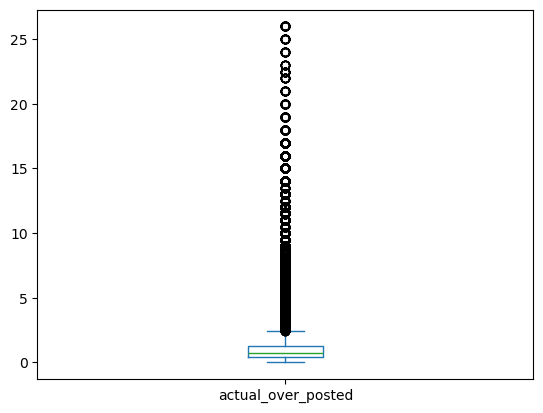

In [30]:
df2_cl['actual_over_posted'].plot(kind='box')

In [32]:
df2_cl_copy = df2_cl.copy()

In [33]:
df2_cl_copy['actual_over_posted'].replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\isabe\AppData\Local\Temp\ipykernel_5168\1718716031.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2_cl_copy['actual_over_posted'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [34]:
df2_cl_copy.head()

,Unnamed: 0,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted
17,17,2015-01-01,7_dwarfs_train,510,55.0,75.0,75.0,0.733333
18,18,2015-01-01,7_dwarfs_train,540,55.0,105.0,105.0,0.523810
19,19,2015-01-01,7_dwarfs_train,570,55.0,120.0,120.0,0.458333
20,20,2015-01-01,7_dwarfs_train,600,55.0,85.0,85.0,0.647059
21,21,2015-01-01,7_dwarfs_train,630,55.0,90.0,90.0,0.611111


In [35]:
df2_cl_copy.describe()

,Unnamed: 0,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted
count,1.751616e+06,1.751616e+06,1.751616e+06,1.751616e+06,1.751616e+06,1.745095e+06
mean,2.211380e+06,1.133608e+03,2.342854e+01,3.191442e+01,3.191442e+01,1.153500e+00
std,1.275966e+06,3.038576e+02,2.132181e+01,2.919913e+01,2.919913e+01,1.436684e+00
min,1.700000e+01,1.800000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.080280e+06,8.700000e+02,1.000000e+01,1.000000e+01,1.000000e+01,4.375000e-01
50%,2.231338e+06,1.140000e+03,2.000000e+01,2.500000e+01,2.500000e+01,7.500000e-01
75%,3.406643e+06,1.410000e+03,3.000000e+01,4.500000e+01,4.500000e+01,1.200000e+00
max,4.264864e+06,1.620000e+03,3.300000e+02,3.600000e+02,3.600000e+02,2.600000e+01


<Axes: >

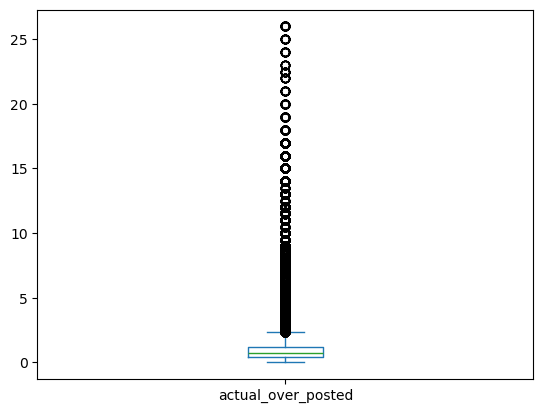

In [36]:
df2_cl_copy['actual_over_posted'].plot(kind='box')

In [37]:
df_7dwarfs = df2_cl_copy[df2_cl_copy['attraction'] == '7_dwarfs_train']

In [38]:
df_7dwarfs.head()

,Unnamed: 0,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted
17,17,2015-01-01,7_dwarfs_train,510,55.0,75.0,75.0,0.733333
18,18,2015-01-01,7_dwarfs_train,540,55.0,105.0,105.0,0.523810
19,19,2015-01-01,7_dwarfs_train,570,55.0,120.0,120.0,0.458333
20,20,2015-01-01,7_dwarfs_train,600,55.0,85.0,85.0,0.647059
21,21,2015-01-01,7_dwarfs_train,630,55.0,90.0,90.0,0.611111


In [39]:
df_7dwarfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65913 entries, 17 to 4262994
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          65913 non-null  int64  
 1   date                65913 non-null  object 
 2   attraction          65913 non-null  object 
 3   minute              65913 non-null  int64  
 4   SACTMIN             65913 non-null  float64
 5   SPOSTMIN            65913 non-null  float64
 6   SPOSTMIN_interp     65913 non-null  float64
 7   actual_over_posted  65913 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 4.5+ MB


C:\Users\isabe\AppData\Local\Temp\ipykernel_5168\590855152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7dwarfs['date'] = pd.to_datetime(df['date'])


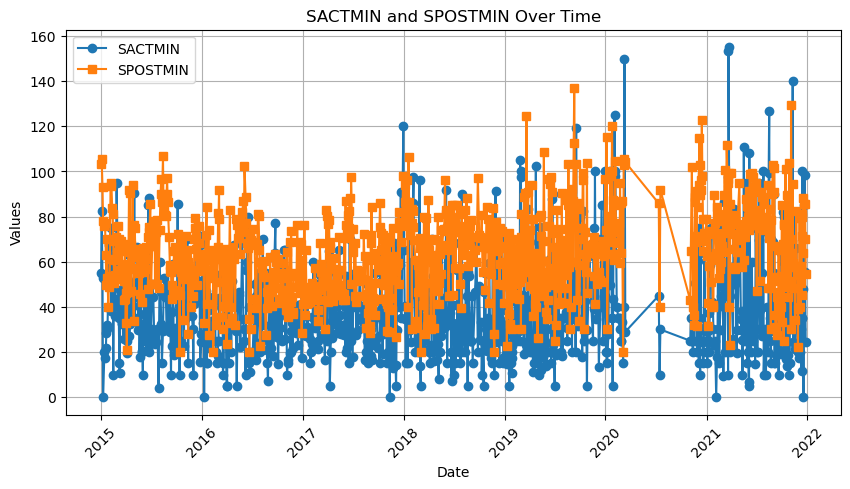

In [40]:
# Convert 'date' column to datetime if it's not already
df_7dwarfs['date'] = pd.to_datetime(df['date'])

# Group by date and aggregate (e.g., mean, sum, etc.)
grouped_df = df_7dwarfs.groupby('date')[['SACTMIN', 'SPOSTMIN']].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(grouped_df.index, grouped_df['SACTMIN'], label='SACTMIN', marker='o')
plt.plot(grouped_df.index, grouped_df['SPOSTMIN'], label='SPOSTMIN', marker='s')

# Formatting
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('SACTMIN and SPOSTMIN Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)

plt.show()

In [41]:
df_7dwarfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65913 entries, 17 to 4262994
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          65913 non-null  int64         
 1   date                28781 non-null  datetime64[ns]
 2   attraction          65913 non-null  object        
 3   minute              65913 non-null  int64         
 4   SACTMIN             65913 non-null  float64       
 5   SPOSTMIN            65913 non-null  float64       
 6   SPOSTMIN_interp     65913 non-null  float64       
 7   actual_over_posted  65913 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 4.5+ MB


In [42]:
df_7dwarfs_no_covid = df_7dwarfs[df_7dwarfs['date'].dt.year != 2020]

In [43]:
df_7dwarfs_ml = df_7dwarfs_no_covid.drop(columns=['date'])

In [44]:
df_7dwarfs_ml.describe()

,Unnamed: 0,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted
count,6.425000e+04,64250.000000,64250.000000,64250.000000,64250.000000,64250.000000
mean,2.123567e+06,1110.757821,40.983969,66.123191,66.123191,0.744162
std,1.306247e+06,319.865748,25.790991,32.348291,32.348291,0.662560
min,1.700000e+01,240.000000,0.000000,5.000000,5.000000,0.000000
25%,9.121932e+05,840.000000,25.000000,40.000000,40.000000,0.388889
50%,2.103956e+06,1140.000000,35.000000,60.000000,60.000000,0.625000
75%,3.355218e+06,1380.000000,55.000000,85.000000,85.000000,0.888889
max,4.262994e+06,1620.000000,215.000000,240.000000,240.000000,12.500000


In [46]:
# mean SPOSTMIN - mean SACTMIN
mean_diff = df_7dwarfs_ml['SPOSTMIN'].mean() - df_7dwarfs_ml['SACTMIN'].mean()
print(mean_diff)

25.139221789883273


In [49]:

X = df_7dwarfs_ml.drop(columns=['actual_over_posted', 'attraction', 'Unnamed: 0'])  # Features
y = df_7dwarfs_ml['actual_over_posted']  # Target variable (numeric)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [50]:
X


,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp
17,510,55.0,75.0,75.0
18,540,55.0,105.0,105.0
19,570,55.0,120.0,120.0
20,600,55.0,85.0,85.0
21,630,55.0,90.0,90.0
...,...,...,...,...
4262990,1500,10.0,35.0,35.0
4262991,1530,10.0,35.0,35.0
4262992,1560,10.0,35.0,35.0
4262993,1590,10.0,35.0,35.0


In [51]:
model = RandomForestRegressor(n_estimators=50, max_samples=0.5, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=0.5, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

MAE: 0.0012
RMSE: 0.0226


mean is 0.74, met sdtev 0.66. Ik ben tevreden over dit model.

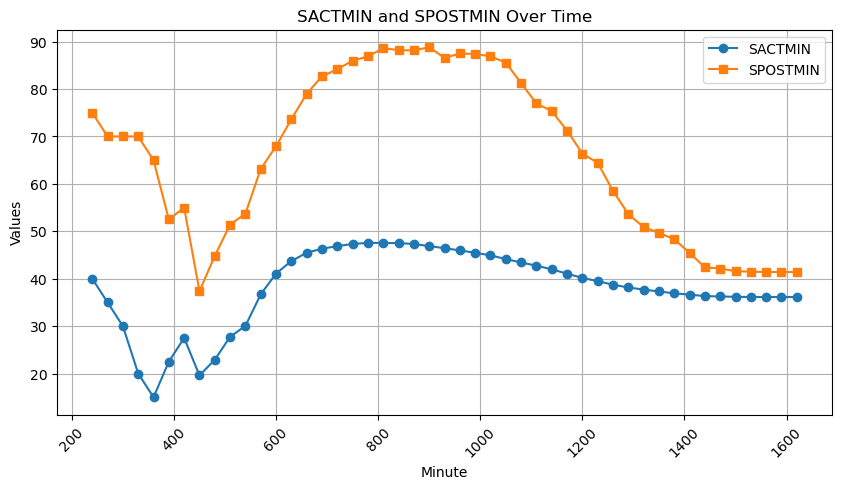

In [53]:
# Group by date and aggregate (e.g., mean, sum, etc.)
grouped_df = df_7dwarfs_ml.groupby('minute')[['SACTMIN', 'SPOSTMIN']].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(grouped_df.index, grouped_df['SACTMIN'], label='SACTMIN', marker='o')
plt.plot(grouped_df.index, grouped_df['SPOSTMIN'], label='SPOSTMIN', marker='s')

# Formatting
plt.xlabel('Minute')
plt.ylabel('Values')
plt.title('SACTMIN and SPOSTMIN Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)

plt.show()